### Decision Tree Algorithm
###### To create a Decision Tree classifier and visualize it graphically.
##### The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [2]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
# Loading the iris dataset
iris=datasets.load_iris()

#forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
df["Species"] = iris.target

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.3 KB


In [6]:
pd.isnull(df).sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

##### As we can see that there are no misssing values present in the data.
#### To Encode the categorical data

### Data Visualization

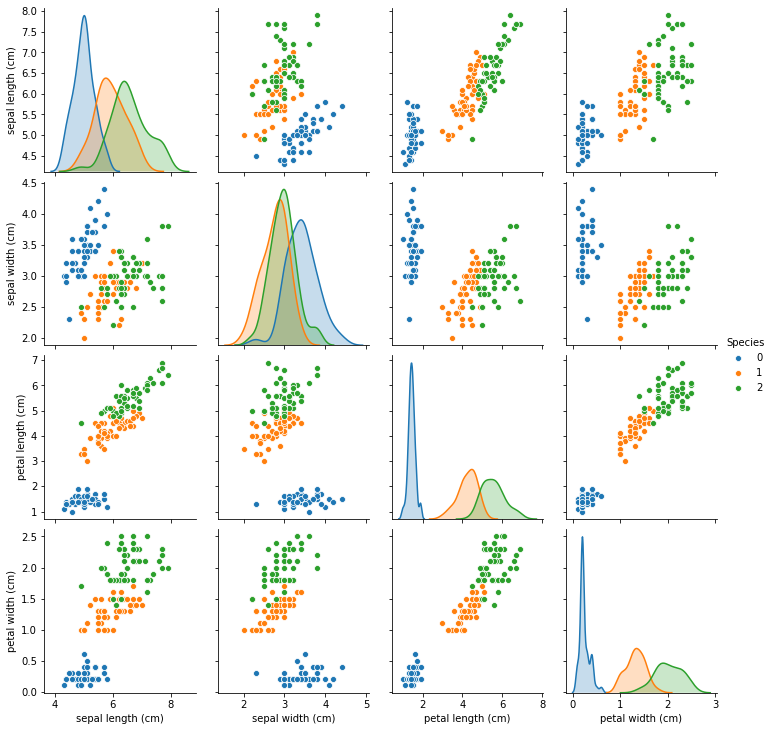

In [7]:
import seaborn as sns
sns.pairplot(df, hue = "Species")

##### Petal lenght and petal width shows high relationship.
### Using the Heatmap to visualize the relationship between the variables.

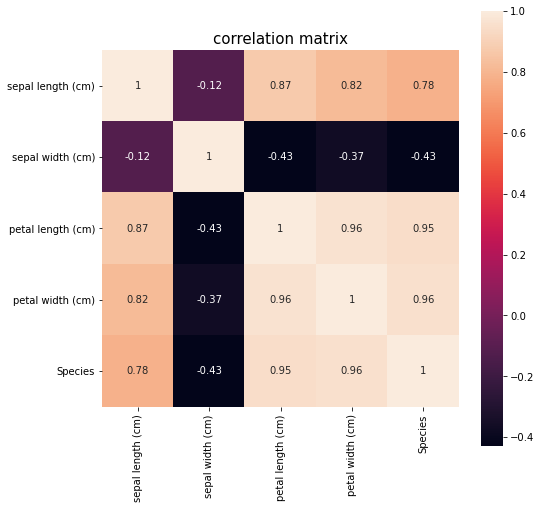

In [8]:
cor = df.corr()
fig = plt.figure(figsize = (8, 8))
mp = sns.heatmap(cor, vmax = 1, square = True, annot = True , color = "Blue")
mp.set_title("correlation matrix", fontsize = 15)
plt.show()

#### The correlation matrix shows that there is high correlation between the features.

### Visualize the Decision Tree to understand it better.

#### Inddividual Box Plots to show spreads of data columns and their respective percentile disstributions. 

Text(0.5, 1.0, 'Box plot for petal width (cm)')

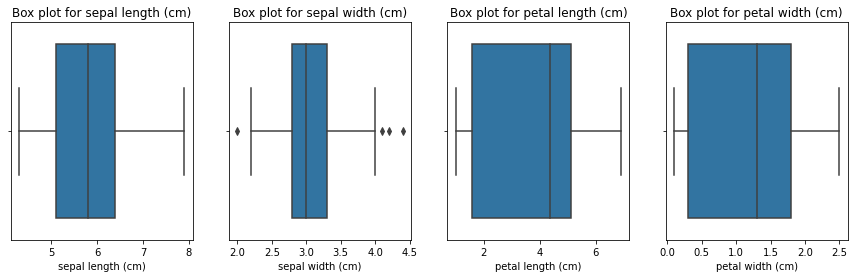

In [9]:
f, axes = plt.subplots(ncols = 4, figsize = (15,4))

sns.boxplot(df['sepal length (cm)'], ax = axes[0])
axes[0].set_title('Box plot for sepal length (cm)') 
                 
sns.boxplot(df['sepal width (cm)'], ax = axes[1])
axes[1].set_title('Box plot for sepal width (cm)')

sns.boxplot(df['petal length (cm)'], ax = axes[2])
axes[2].set_title('Box plot for petal length (cm)')
            
sns.boxplot(df['petal width (cm)'], ax = axes[3])
axes[3].set_title('Box plot for petal width (cm)')
              

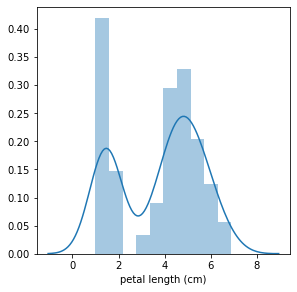

In [11]:
plt.figure(figsize = (10, 10))
binsize = 10
plt.subplot (2, 2, 1)
sns.distplot(a = df['petal length (cm)'], bins = binsize)


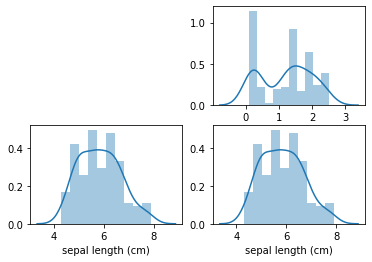

In [12]:
plt.subplot (2, 2, 2)
sns.distplot(a = df['petal width (cm)'], bins = binsize)
plt.subplot (2, 2, 3)
sns.distplot(a = df['sepal length (cm)'], bins = binsize)
plt.subplot (2, 2, 4)
sns.distplot(a = df['sepal length (cm)'], bins = binsize)

In [17]:
# Setting the variables
x = df.drop("Species", axis = 1)
y = df.Species

In [18]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [20]:
# Splitting the data
# we have already imported the required library to split the into training and test data
# Assign the variables to capture train test split output
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [21]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
dtree=DecisionTreeClassifier(random_state = 0)
dtree.fit(x_train, y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


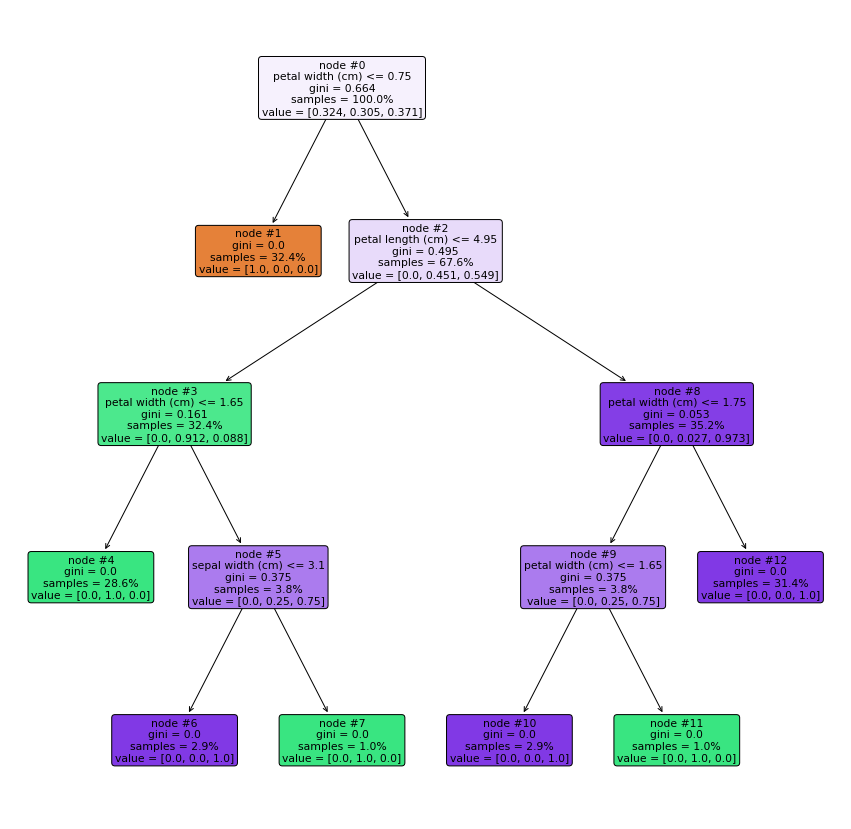

In [23]:
plt.figure(figsize = (15,15))
tree.plot_tree(dtree, filled = True, rounded = True, proportion = True, node_ids = True, feature_names = iris.feature_names)
plt.show()

In [24]:
predict = dtree.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("Accuracy of the model is", accuracy_score(predict, y_test))

print("Classification of the model is", classification_report(predict, y_test))

Accuracy of the model is 0.9777777777777777
Classification of the model is               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

